In [1]:
%matplotlib inline
from brian2 import *
prefs.codegen.target = 'numpy'
from brian2tools import *

## Synapses

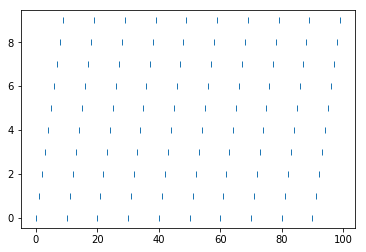

In [2]:
# Regular spiking cells (will be useful as stimulation for other neurons later)
start_scope()
input_group = SpikeGeneratorGroup(10, np.arange(10), np.arange(10)*ms,
                                  period=10*ms)
spike_mon = SpikeMonitor(input_group)
run(100*ms)
plot(spike_mon.t/ms, spike_mon.i, '|');

In [3]:
start_scope()

input_spikes = SpikeGeneratorGroup(10, np.arange(10), np.arange(10)*ms,
                                   period=10*ms)
Cm = 200*pF
E_L = -70*mV
f = 100*Hz

eqs = '''
dVm/dt = (I_inj + g_L*(E_L - Vm))/Cm : volt (unless refractory)
g_L : siemens
I_inj = 0*nA : amp
'''
group = NeuronGroup(10, eqs, threshold='Vm > -45*mV',
                    reset='Vm = E_L',
                    refractory=5*ms, method='euler')
group.Vm = E_L
group.g_L = '10*nS + rand()*5*nS'

# The most simple possible synapse model: when a pre-synaptic spike arrives
# ("on_pre"), increase the post-synaptic potential by w. This can of course
# be way more complex, e.g. use differential equations to model the synaptic
# dynamics
syn = Synapses(input_spikes, group, 'w : volt',
               on_pre='Vm_post += w')
syn.connect()
syn.w = '1*mV + rand()*4*mV'
# "delay" is a pre-defined variable that can be accessed/set like any other
# synaptic variable. It sets the transmission delay for spikes:
syn.delay = '1*ms + rand()*5*ms'
mon = StateMonitor(group, 'Vm', record=True)

run(100*ms, report='text')

Starting simulation at t=0. s for a duration of 100. ms
0.1 (100%) simulated in < 1s


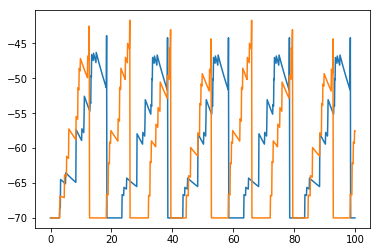

In [4]:
plt.plot(mon.t/ms, mon.Vm[0]/mV)
plt.plot(mon.t/ms, mon.Vm[1]/mV);